# 모델링 개요 : 무작정 따라하기

일단 모델링 해 봅시다.
* 목표 : 모델링 코드를 외운다!

## 지도 학습
Label이 있는(사전에 정답이 결정되어 있는) dataset을 가지고 모델을 학습, 훈련시킴

## 비지도 학습
Label이 없는 dataset을 가지고 model을 통해 label을 부여하거나 분리

## 강화 학습
특정 상태(state)에서 어떤 행동(action)을 취하는 것이 최적인지 학습
예: 게임 학습
- Agent: 플레이어 캐릭터
- Environment: Agent가 상호작용하는 외부 세계
- State: Agent가 현재 있는 위치나 상황
- Action: Agent가 Environment에서 취할 수 있는 행동
- Reward: Agent가 어떤 Action을 취했을 때 Environment로부터 받는 피드백(보상)
- Policy: Agent가 어떤 State에서 어떤 Action을 취할지 결정하는 전략

## 0.환경준비

In [1]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원)
import matplotlib.pyplot as plt  # 그래프

from sklearn.model_selection import train_test_split  # 데이터 분할
# 싸이킷런 scikit-learn

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

## 1.데이터 로딩

In [2]:
# 깃허브에 올려 놓은 예제 데이터를 가져와서 '데이터프레임'에 저장합니다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/advertising.csv'
data = pd.read_csv(path)

# 데이터프레임을 살짝 열어 봅니다.(상위 5개 행 조회)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* TV, Radio, Newspaper 광고비용 지출에 따른 판매액 데이터입니다.
* 광고비용을 어떻게 지출하느냐에 따라 매출액은 어떻게 달라질까요?

## 2.데이터 전처리

1) 데이터를 X와 y로 나누기
> * **X** : **features**, input, 조작변수, 요인, (독립변수)
* **y** : **target**, output, 결과변수, label, (종속변수)

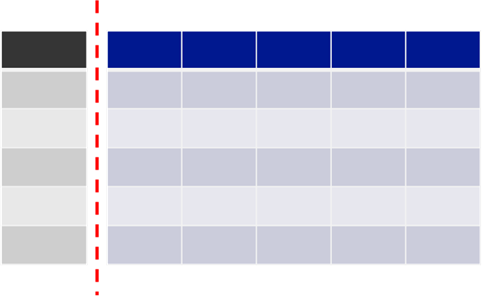

In [ ]:
# 1) 먼저 x와 y로 분할
target = 'Sales' # feature 열
x = data.drop(target, axis=1) # .drop(   , inplace = True)
y = data.loc[:, target] # : 처음부터 끝까지  data['Sales']

In [4]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


2) train, validation, test로 분할

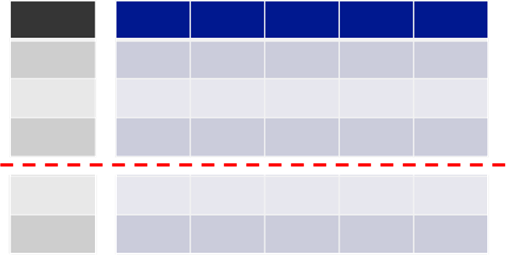

In [5]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

* 필요한 함수들 불러오기

In [12]:
# 알고리즘 불러오기 : 선형회귀
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error #평균 오차 의미

* 모델 선언하기

In [ ]:
# 모델 선언 : 알고리즘을 어떻게 사용할지 설정
model = LinearRegression() # 선형회귀

* 학습

In [8]:
# 학습 : .fit   ==> 학습은 x와 y의 패턴을 찾아내는 과정입니다.
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 4.예측
* 학습의 결과 모델이 만들어 집니다.
* 모델이 얼마나 정확한지 검증해 봅시다.

In [ ]:
pred = model.predict(x_test) 

In [10]:
pred

array([ 8.33806441, 21.92272927, 16.96215603,  8.82648131, 23.20773427,
       19.85710111,  8.13749585, 10.06725454, 13.93733899, 16.83742605,
       21.72905071, 16.62406073, 20.71607448,  5.46331574, 14.12908503,
       18.99267174,  6.32621735, 16.74822763,  9.8112106 , 11.24951999,
       24.12690046,  7.0873924 , 17.29490136, 24.81683944, 21.88789422,
        4.44007204,  9.97730085, 12.52205791, 16.54220912, 16.22759801,
       18.41919239, 10.33877559, 18.20315202, 12.89852525, 18.28270934,
       15.45917392,  8.51316742,  9.82613173, 11.54291114, 12.91984401,
       18.69055998, 17.5376458 ,  9.97205195, 15.44420008, 17.36058891,
       10.65670351,  3.86851921,  9.17550897, 10.33609778, 17.21524474,
       13.57621862, 22.99841892,  9.52994505, 14.35321298, 15.72024004,
       17.50200828, 13.88423885,  6.04970745,  7.65948804, 19.07999706])

## 5.평가

In [ ]:
# 평균 오차
mean_absolute_error(y_test, pred)
# 이번 시행에서 실제 y_test와 pred 간의 평균 오차는 1.326 (백분율이 아닌 실제 값의 오차)

1.3269467071592198

# 복습문제1 : Diamond Price 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

## 1.데이터 로딩

In [36]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv'
data = pd.read_csv(path)
data = data.sample(2000, random_state=20)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
20244,1.52,Fair,H,VS2,62.1,66.0,8674,7.33,7.13,4.50
45013,0.54,Premium,G,VS2,62.0,58.0,1637,5.21,5.18,3.22
53351,0.70,Premium,E,VS2,62.0,60.0,2657,5.70,5.59,3.50
47212,0.59,Ideal,E,VS2,62.2,58.0,1838,5.35,5.39,3.34
1460,0.86,Premium,F,SI2,61.8,58.0,2980,6.12,6.15,3.79


## 2.데이터 전처리

* 분할1 : x, y

In [37]:
target = 'price'
x = data.drop(target, axis=1)
y = data.loc[:, target]

* 가변수화

In [38]:
col_cat = ['cut','color','clarity']
x = pd.get_dummies(x, columns = col_cat, drop_first = True)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [40]:
model = LinearRegression()

In [41]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 4.예측


In [42]:
pred = model.predict(x_test)

## 5.평가

In [44]:
mean_absolute_error(y_test, pred)

742.792505021325

# 복습문제2 : 보스턴시 타운별 집값 예측
* 위 코드를 보면서 그대로 따라해보기
* copy & paste 보다는 보면서 따라 코딩하기를 권장합니다.

## 1.데이터 로딩

In [45]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
cols = ['crim','indus','chas','nox','rm', 'dis', 'tax','ptratio','lstat','medv']
data = pd.read_csv(path, usecols = cols)
data.head()

,crim,indus,chas,nox,rm,dis,tax,ptratio,lstat,medv
0,0.00632,2.31,0,0.538,6.575,4.0900,296,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,4.9671,242,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,4.9671,242,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,6.0622,222,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,6.0622,222,18.7,5.33,36.2


## 2.데이터 전처리

In [46]:
# 1) 먼저 x와 y로 분할
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [47]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 3.학습

In [48]:
model = LinearRegression()

In [49]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 4.예측


In [50]:
pred = model.predict(x_test)

## 5.평가

In [ ]:
mean_absolute_error(y_test, pred)

3.3673148076945254